## Intro

In this notebook, we'll try using different traditional ML algorithms to solve the emails classification challenge. For this task, we'll take 6 categories into consideration.

Categories:
1) Rechnungen 
2) Mahnungen 
3) Vertraege und Vereinbarun 
4) Storno 
5) Aktivierung Sim 
6) Tarife 

The approches we'll use are SVM, Logistic regression, Random forest, and MultinomialNB

## Manage directories

In [1]:
import os

In [2]:
SHORT_EMAIL_DATASET_PATH = "short_dataset.csv"

## EDA

In [3]:
import pandas as pd 

pd.__version__

'2.1.0'

In [4]:
# converting csv file to pandas dataframe 
df = pd.read_csv(SHORT_EMAIL_DATASET_PATH)

In [5]:
df.head()

,Unnamed: 0,Category,Content
0,0,TARIFE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...
1,1,TARIFE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t3...
2,2,TARIFE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...
3,3,TARIFE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...
4,4,TARIFE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t3...


In [6]:
df = df.drop('Unnamed: 0', axis=1)

In [7]:
df.head()

,Category,Content
0,TARIFE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...
1,TARIFE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t3...
2,TARIFE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...
3,TARIFE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...
4,TARIFE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t3...


In [8]:
print(df['Content'][0])

An:	KUNDENSERVICE@EPLUS
Kopie:	 
Datum:	06.06.2001 08:46:53
Betreff:	E-Mail Beantwortung

	  



Anrede         : Frau
Name           : Sim Karte Gesperrt Thielsch Kai
Handyrufnummer : 49 178 8820181
Account Nummer :
Handymodell    : 6150
Provider       : E-Plus Service
Email          : kaithielsch@gmx.de
-------------------------------------
Nachricht      : Liebes e plus Team
Ich habe aus versehen meinen Pin und den darauffolgenden "puk" falsch 
eingegeben
Nun ist meine sim karte gesperrt
Wie kann ich einen neuen Pin bekommen damit mein handy wieder 
einsatzbereit ist??

Vielen dank im vorraus
Mit freundlichen grüßen
Kai Thielsch
-------------------------------------
--444043493.991813613145.JavaMail.nsuser@apps3mn1--




In [9]:
print(df['Category'][0])

TARIFE


The category of the email above is TARIFE

Now, we need to shuffle the dataset in order to avoid sample selection bias.

In [10]:
df = df.sample(frac=1)

In [11]:
df.head()

,Category,Content
79,TARIFE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...
280,VERTRAEGE_UND_VEREINBARUN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...
95,TARIFE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...
298,VERTRAEGE_UND_VEREINBARUN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...
303,VERTRAEGE_UND_VEREINBARUN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...


In [12]:
# reset index 
df.reset_index(drop=True, inplace=True)

In [13]:
df.head()

,Category,Content
0,TARIFE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...
1,VERTRAEGE_UND_VEREINBARUN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...
2,TARIFE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...
3,VERTRAEGE_UND_VEREINBARUN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...
4,VERTRAEGE_UND_VEREINBARUN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...


In [14]:
# checking for Null values
df.isna().any()

Category    False
Content     False
dtype: bool

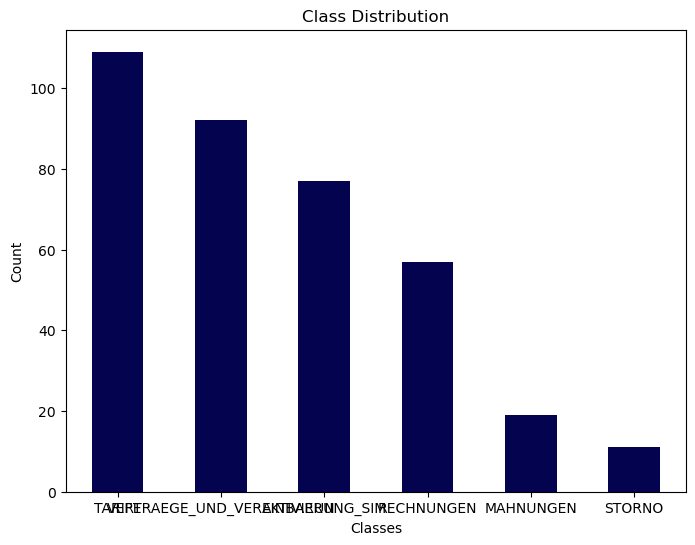

In [15]:
import matplotlib.pyplot as plt 

# Count the occurrences of each class
class_counts = df['Category'].value_counts()

# Plotting the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=(0.01,0.01,0.31))
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

We obviously deal with the dataset imbalance, and possible soultions are over- and undersampling, but as for now we ignore the fact.

In [16]:
from text_cleaning import fetch_body

df['Email_body'] = df['Content'].apply(fetch_body)

/home/klychliiev/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:611: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/klychliiev/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:740: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 803: system has unsupported display driver / cuda driver combination (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() if nvml_count < 0 else nvml_count


In [17]:
df

,Category,Content,Email_body
0,TARIFE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...,An:\tKUNDENSERVICE@EPLUS Kopie:\t Datum:\t03....
1,VERTRAEGE_UND_VEREINBARUN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...,"Sehr geehrte Damen & Herren, als Termin für di..."
2,TARIFE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...,An:\tKUNDENSERVICE@EPLUS Kopie:\t Datum:\t01....
3,VERTRAEGE_UND_VEREINBARUN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...,"Sehr geehrte Damen und Herren, in wieweit bes..."
4,VERTRAEGE_UND_VEREINBARUN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...,Sehr geehrte Damen und Herren Ich Volker Keß ...
...,...,...,...
360,TARIFE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...,Ich fliege am 5.August nach Lanzarote und möch...
361,AKTIVIERUNG_SIM,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...,Hallo e-plus! Mein Handy (Nokia 3210) findet d...
362,AKTIVIERUNG_SIM,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...,Seit Freitag Morgen verlangt mein Mobiltelefon...
363,TARIFE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...,"Sehr geehrte Damen und Herren, ich hatte mich ..."


In [19]:
print(df['Email_body'][1])

Sehr geehrte Damen & Herren, als Termin für die Einführung der Eplus Twin Card wurde zuerst erstes und  dann zweites Quartal '01 genannt. Da auch jetzt dieses Feature nicht  verfügbar ist würde mich mal interessieren warum dies nicht der Fall ist.  Die D-Netze bieten es schließlich schon seit Jahren an.  mit freundlichem Gruß Moritz Krügel 


## Text cleaning

In [20]:
from text_cleaning import preprocess_text

In [21]:
x = df['Email_body'][50]
x

'Guten Tag, ich habe letzten Donnerstag einen Vertrag (direkt mit e-Plus/kein  Provider) im "Phone house" (Geschäft) abgeschlossen. Bereits vorher habe ich mehrfach bei e-Plus telefonisch nachgefragt, ob  auch meine Wunschrufnummer frei ist (0178/460 37 19). Dies wurde mir auch  mehrfach telefonisch bestätigt. Daraufhin bin ich dann zum Händler, der dann auch noch mal telefonisch bei  e-Plus nachgefragt hat. Wieder wurde ihm bestätigt, daß meine  Wunschrufnummer frei wäre. Ich habe aufgrunddessen dann einen Professional  XL-Vertrag abgeschlossen. Allerdings wurde mir dann vom Händler mitgeteilt, als das Handy  freigeschaltet war und ich es abholen wollte, daß e-Plus sich vertan hätte  und mir eine falsche Nummer zugeteilt hätte. Er habe aber schon mit e-Plus  telefoniert. Man würde den Fehler umgehend kostenlos beheben und mir meine  freie Wunschrufnummer zuteilen. Ich bekäme eine SMS, wenn dies geschehen  wäre. Da nichts kam, habe ich mehrfach nachgefragt (bei e-Plus) und immer wieder

In [22]:
print(preprocess_text(x))

gut letzter donnerstag vertrag direkt e-plus provider phone house geschäft abschließen vorher mehrfach e-plus telefonisch nachfragen wunschrufnummer frei 0178 460 37 19 mehrfach telefonisch bestätigen daraufhin händler mal telefonisch e-plus nachfragen bestätigen wunschrufnummer frei aufgrunddesse professional xl-vertrag abschließen händler mitteilen handy freischalten abholen e-plus vertan falsch nummer zuteilen e-plus telefoniern fehler umgehend kostenlos beheben frei wunschrufnummer zuteilen bekommen sms geschehen mehrfach nachfragen e-plus wurd emir bearbeitung irgendwann nächster bekommen sms wunschrufnummern-hotline anrufen sollen nummer tauschen bekommen kollegin verstehen direkt nummer bekommen eher problem nummer frei schalen sofort klappen verstehen rücksprach halten derweil musik gehören melden si


In [23]:
df['Clean_texts'] = df['Email_body'].apply(preprocess_text)

In [24]:
df.head()

,Category,Content,Email_body,Clean_texts
0,TARIFE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...,An:\tKUNDENSERVICE@EPLUS Kopie:\t Datum:\t03....,kundenservice@eplus kopie datum 03.09.2001 22...
1,VERTRAEGE_UND_VEREINBARUN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...,"Sehr geehrte Damen & Herren, als Termin für di...",geehrt damen & herren termin einführung eplus ...
2,TARIFE,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...,An:\tKUNDENSERVICE@EPLUS Kopie:\t Datum:\t01....,kundenservice@eplus kopie datum 01.07.2001 19...
3,VERTRAEGE_UND_VEREINBARUN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...,"Sehr geehrte Damen und Herren, in wieweit bes...",geehrt dam herr wieweit bestehen möglichkeit e...
4,VERTRAEGE_UND_VEREINBARUN,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...,Sehr geehrte Damen und Herren Ich Volker Keß ...,geehrt dam herr volker keß 07.02.01 e-plus ver...


In [51]:
# from cleantext import clean 

# sent = clean(sentence_example,
#     fix_unicode=True,
#     to_ascii=True,
#     lower=True,
#     no_line_breaks=True,
#     no_urls=True,
#     no_emails=True,
#     no_phone_numbers=True,
#     no_numbers=True,
#     no_digits=True,
#     no_punct=True,
#     no_currency_symbols=True,
#     replace_with_punct="",          # instead of removing punctuations you may replace them
#     replace_with_url="",
#     replace_with_email="",
#     replace_with_phone_number="",
#     replace_with_number="",
#     replace_with_digit="",
#     replace_with_currency_symbol="",
#     lang="de"     
#     )

## Define the classifier 

In [36]:
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings('ignore')

label_encoder = LabelEncoder()

df['Category_ID'] = label_encoder.fit_transform(df['Category'])

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

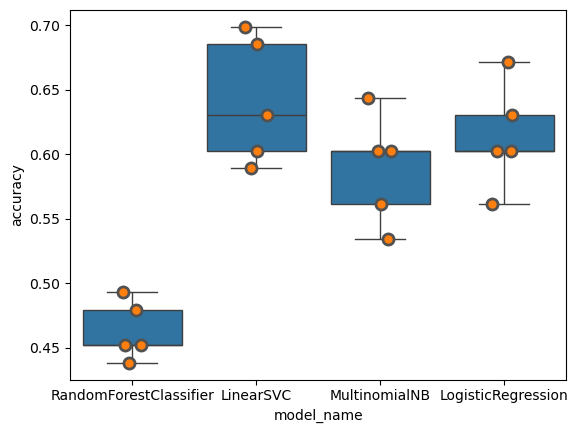

In [31]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))
features = tfidf.fit_transform(df.Clean_texts).toarray()
labels = df.Category

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [32]:
categories_list = list(df['Category'].unique())

In [35]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.641096
LogisticRegression        0.613699
MultinomialNB             0.589041
RandomForestClassifier    0.463014
Name: accuracy, dtype: float64

Compare with the performance of the model trained on the unpreprocessed text:

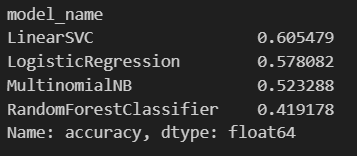

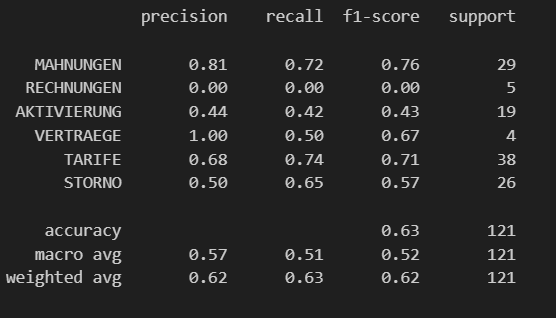

## <b>Issues:</b>
1) Imbalanced dataset 
2) Encoding problems:<br>
<em>vielen Dank fьr Ihre schnelle Antwort!!!</em> (must be <em>für</em>)
3) Cleaning method 
4) Small dataset
5) Abbreviations 